# 2

In [1]:
# Load Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [2]:
test_Df = pd.read_csv("C:/Users/HP/Documents/ML/Py_Dataset/dont-overfit-ii/test.csv")
train_Df = pd.read_csv("C:/Users/HP/Documents/ML/Py_Dataset/dont-overfit-ii/train.csv")

In [3]:
test_Df.shape, train_Df.shape

((19750, 301), (250, 302))

In [4]:
# What are the columns in Train but not in Test
features = []
features_2 = []
for col in train_Df.columns:
    features.append(col)
for col2 in test_Df.columns:
    features_2.append(col2)
for a in features:
    if (a not in features_2):
        print(a)

target


In [5]:
test_Df.head(), train_Df.head()

(    id      0      1      2      3      4      5      6      7      8  ...    \
 0  250 -0.677  1.721 -0.745 -0.838  0.149 -1.138  0.242  0.504 -1.829  ...     
 1  251 -0.731 -0.251  0.059  0.054  1.149  2.462  0.836  0.719 -2.269  ...     
 2  252  1.119  1.036  1.220  1.518  0.265 -0.088  0.245 -0.533 -0.921  ...     
 3  253 -0.933  0.212 -0.053  0.570 -1.540 -1.108  0.462  1.022 -0.215  ...     
 4  254 -0.208 -0.556  2.641  0.853 -0.384  0.312  0.514  0.481 -1.929  ...     
 
      290    291    292    293    294    295    296    297    298    299  
 0 -1.180 -0.403  0.759 -0.600  0.951 -0.349  0.446 -0.819 -0.277  1.297  
 1  1.297  1.114  0.657  0.760  0.899 -1.612 -1.701  1.107 -0.314 -0.641  
 2 -0.864 -0.736  0.367  0.154  0.830 -1.352  0.914  0.377  0.588 -0.912  
 3  0.063 -0.958  0.762 -0.213 -2.171  0.830  1.435  0.125  2.782  0.619  
 4 -0.689  0.213  0.568 -0.935 -0.015  0.267  0.739  1.340 -0.178  1.010  
 
 [5 rows x 301 columns],
    id  target      0      1      2

In [6]:
test_Df.describe()

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
count,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,...,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000
mean,10124.500000,0.010933,-0.005470,0.003176,-0.000584,-0.011377,0.001225,0.008716,-0.003512,-0.005035,...,0.002145,0.004692,0.004862,-0.002706,0.004469,-0.003974,-0.003001,-0.005502,0.011342,0.004954
std,5701.478244,0.997062,1.002163,1.001684,0.992821,0.997261,1.002442,1.003023,1.004868,0.998808,...,1.000769,0.999980,0.998581,0.993671,0.996648,1.008269,1.002226,0.996583,1.003967,0.998843
min,250.000000,-4.109000,-4.613000,-3.749000,-3.685000,-3.711000,-3.911000,-4.863000,-3.879000,-4.051000,...,-4.444000,-3.879000,-3.919000,-3.632000,-3.783000,-3.950000,-4.052000,-3.695000,-3.760000,-3.740000
25%,5187.250000,-0.667000,-0.673000,-0.669000,-0.673750,-0.678750,-0.683750,-0.670000,-0.674000,-0.691000,...,-0.676000,-0.668000,-0.680000,-0.680000,-0.670000,-0.686000,-0.681000,-0.683000,-0.675750,-0.667000
50%,10124.500000,0.017000,-0.006000,-0.000000,-0.004500,-0.013000,0.000000,0.014000,-0.003000,-0.010000,...,0.004000,0.006000,0.005000,-0.006000,0.003000,-0.001000,0.004000,-0.016000,0.009500,0.009500
75%,15061.750000,0.689000,0.674000,0.675000,0.660000,0.661000,0.676000,0.694750,0.670000,0.667000,...,0.681000,0.677000,0.684750,0.665000,0.682750,0.675750,0.668000,0.666750,0.692000,0.676000
max,19999.000000,3.775000,3.725000,3.922000,3.969000,3.806000,3.744000,3.733000,4.199000,3.475000,...,4.072000,3.911000,3.580000,3.823000,3.643000,5.042000,3.798000,3.779000,4.190000,3.796000


In [7]:
train_Df['target'].describe() 

count    250.000000
mean       0.268000
std        0.443806
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

#### Our Predictor is Binary,  with no missing value, Ordinarily I think a Logistic Regression model is appropriate.

In [8]:
# Checking for missing values
def count_missing(df):
    for col in df.columns:
        if df[col].isna().sum() > 0:
            return col
    else:
        print("Data is clean")

In [9]:
count_missing(test_Df), count_missing(train_Df)

Data is clean
Data is clean


(None, None)

In [10]:
# Class Distribution
print(train_Df.groupby('target').size())

target
0.0    183
1.0     67
dtype: int64


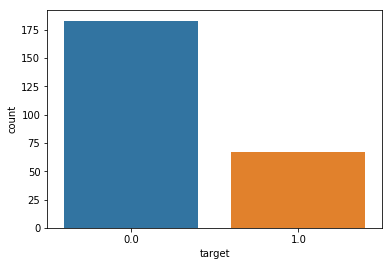

In [11]:
# Predictor
sns.countplot(train_Df['target'], label = 'Count')
plt.show()

#### Data Visualization

Text(0.5, 1.0, 'Distribution of Standard Deviation of our Training Features')

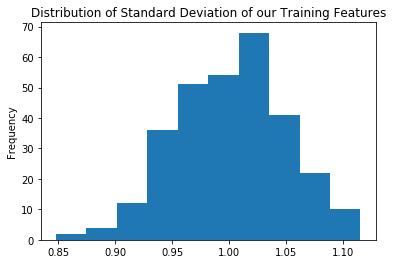

In [12]:
train_Df[train_Df.columns[2:]].std().plot('hist');
plt.title("Distribution of Standard Deviation of our Training Features")

Text(0.5, 1.0, 'Distribution of Mean of our Training Features')

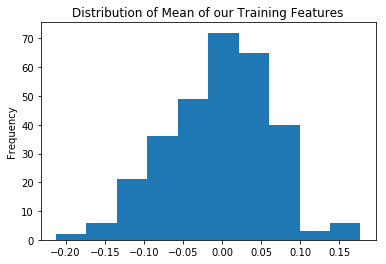

In [13]:
train_Df[train_Df.columns[2:]].mean().plot('hist');
plt.title("Distribution of Mean of our Training Features")

In [14]:
# Lets drop 'id'
def drop_id(df):
    df.drop(columns = 'id', inplace=True)
    return df.shape
    
drop_id(test_Df), drop_id(train_Df)

((19750, 300), (250, 301))

### Feature Selection

In [15]:
# Features
X = train_Df.drop(columns = 'target')

In [69]:
y = train_Df['target']

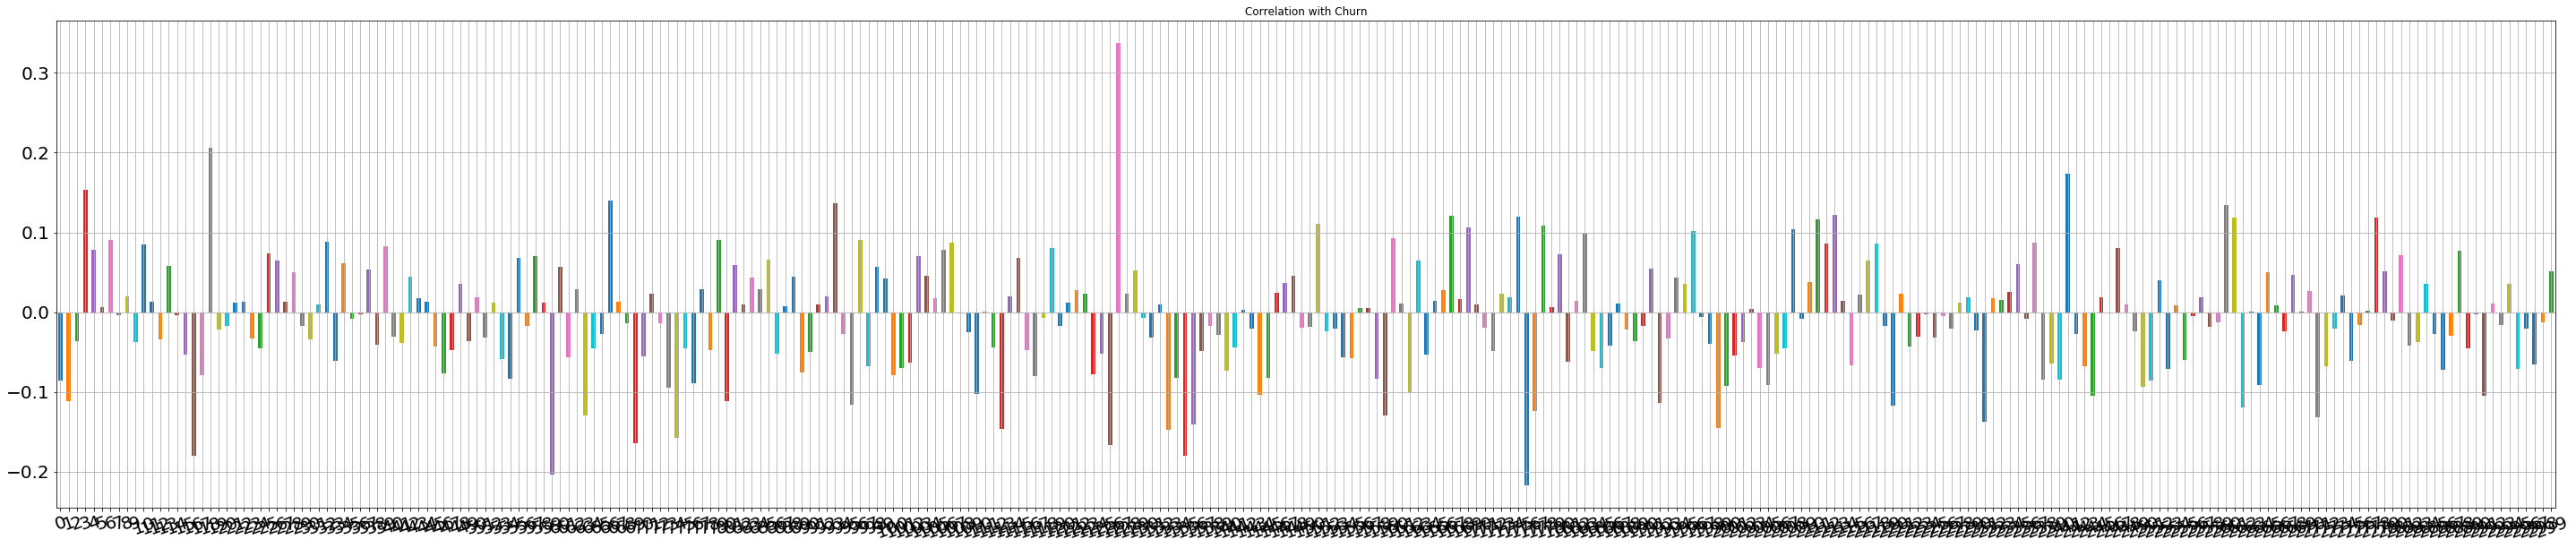

In [17]:
# Visualizing our features' Correlation
X.corrwith(train_Df.target).plot.bar(figsize = (50, 10),
                                      title = "Correlation with Churn",
                                      fontsize = 20, rot = 20, grid = True)
plt.show()

##### Cross Correlations within our Features

In [18]:
corrs = train_Df.corr().abs().unstack().sort_values(kind="quicksort").reset_index()
corrs = corrs[corrs['level_0'] != corrs['level_1']][::2]
corrs.rename(columns =
             {'level_0':'Feature_1', 'level_1':'Feature_2',
              0:'Correlation Coef'}, inplace = True)
# Highest Correlation Coefficients
corrs.tail(10).T

,90280,90282,90284,90286,90288,90290,90292,90294,90296,90298
Feature_1,109,83,176,125,295,279,23,146,39,127
Feature_2,124,43,128,11,64,219,20,228,6,target
Correlation Coef,0.226356,0.227012,0.229053,0.229146,0.231097,0.238512,0.246984,0.258447,0.267727,0.33754


##### Correlations between our Target variable

In [19]:
# Ten Highest Correlations 
highest_ten = X.corrwith(train_Df.target).abs().sort_values(ascending = False)[:10]
print(highest_ten, '\n')
# Ten Lowest Correlations
lowest_ten  = X.corrwith(train_Df.target).abs().sort_values(ascending = False)[-10:]
lowest_ten

127    0.337540
176    0.217100
18     0.206452
59     0.203166
135    0.179960
16     0.179796
241    0.173879
126    0.167064
69     0.164571
74     0.157756
dtype: float64 



290    0.003138
142    0.003135
224    0.002300
36     0.002200
277    0.001633
108    0.001018
111    0.000971
246    0.000778
263    0.000624
269    0.000211
dtype: float64

### Applying Base Model: Logistic Regression

After Scaling our Features.

- Use the GridSearchCV module to find the best parameters
- Enter the Best Parameters
- Cross Validate

#### Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_s_train = pd.DataFrame(sc_X.fit_transform(X))
X_s_validation = pd.DataFrame(sc_X.fit_transform(test_Df))

n_fold = 20
folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
kfold = KFold(n_splits = 10, shuffle = True, random_state = 7)

#### Logistic Regression: GridSearch For the best Parameters

In [21]:
lr = LogisticRegression(solver='liblinear', max_iter=1000)

parameter_grid = {'class_weight' : ['balanced', None],
                  'penalty' : ['l2'],
                  'C' : [0.001, 0.01, 0.08, 0.1, 0.15, 1.0, 10.0, 100.0],
                  'solver': ['newton-cg','sag','lbfgs']
                 }

grid_search = GridSearchCV(lr, 
                           param_grid=parameter_grid, 
                           cv=folds, scoring='roc_auc')
grid_search.fit(X_s_train, y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

print('\n#-----------------\n')
parameter_grid = {'class_weight' : ['balanced', None],
                  'penalty' : ['l2', 'l1'],
                  'C' : [0.001, 0.01, 0.08, 0.1, 0.15, 1.0, 10.0, 100.0],
                  'solver': ['liblinear', 'saga']
                 }

grid_search = GridSearchCV(lr, 
                           param_grid=parameter_grid, 
                           cv=folds, scoring='roc_auc')
grid_search.fit(X_s_train, y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.7006444444444444
Best parameters: {'C': 0.08, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}
#-----------------

Best score: 0.785088888888889
Best parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}


##### Logistic Regression: Applying our Parameters

In [23]:
logi = LogisticRegression(random_state = 0, class_weight='balanced',
                          C = 0.1, penalty = 'l1', solver='saga')
logi.fit(X_s_train, y)

LogReg: [mean]0.720000 [std](0.050596)


In [44]:
logi

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=0,
          solver='saga', tol=0.0001, verbose=0, warm_start=False)

#### Cross Validation

In [24]:
logi_accuracy = cross_val_score(estimator = logi, X = X_s_train,
                                y = y, cv = kfold, scoring = 'accuracy')
print('%s: [mean]%f [std](%f)' % ('LogReg', logi_accuracy.mean(), 
                                  logi_accuracy.std()))

(0.708, 0.06462197768561405)

### RandomForestClassifier

- First, lets use the GridSearchCV module to find the best parameters
- Enter the Best Parameters
- Cross Validate

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
n_fold = 20
folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)


parameter_grid = {'n_estimators': [10, 50, 100, 1000],  # The number of trees in the forest.
                  'max_depth': [None, 3, 5, 15, 50]        # The maximum depth of the tree.
                 }

grid_search = GridSearchCV(rfc, param_grid=parameter_grid, cv=folds, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X, y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
rfc = RandomForestClassifier(**grid_search.best_params_)

Best score: 0.7061111111111112
Best parameters: {'max_depth': None, 'n_estimators': 1000}


In [27]:
random_forest_e = RandomForestClassifier(n_estimators = 1000, criterion = 'gini', 
                                         random_state = 50, max_depth = 'None')
random_forest_e.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=50, verbose=0, warm_start=False)

#### Cross Validation

In [28]:
rf_accuracy = cross_val_score(estimator = random_forest_e, 
                              X= X_s_train, y= y, cv=kfold, 
                              scoring = 'accuracy')

print('%s: [mean]%f [std](%f)' % ('RFC', 
                                  rf_accuracy.mean(), rf_accuracy.std()))

(0.732, 0.031240998703626625)

### Other Models

In [30]:
# Spot Check Algorithms
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Evaluate each model in Turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
    cv_results = cross_val_score(model, X_s_train, y, cv=kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: [mean]%f [std](%f)' % (name, cv_results.mean(), cv_results.std()))

LR: [mean]0.667077 [std](0.069843)
LDA: [mean]0.615282 [std](0.124142)
KNN: [mean]0.696513 [std](0.044089)
CART: [mean]0.588090 [std](0.088482)
NB: [mean]0.715590 [std](0.066635)
SVM: [mean]0.732231 [std](0.012458)


?That's weird SVC and RandomForestClassifier have the same results...

RFC and SVC have the highest accuracy mean as well as the lowest standard deviation

In [65]:
# Lets import a submission sample, use it for validation
y_validation = pd.read_csv("C:/Users/HP/Documents/ML/Py_Dataset/dont-overfit-ii/sample_submission.csv")
y_validation = y.drop(columns = 'id')
y_validation.shape, len(X_s_train)

((19750, 1), 250)

In [38]:
predictions = random_forest_e.predict(X_s_validation)
acc = accuracy_score(y_validation, predictions)
try:
    roc = roc_auc_score(y_validation, predictions)
except ValueError:
    pass
prec = precision_score(y_validation, predictions)
rec = recall_score(y_validation, predictions)
f1 = f1_score(y_validation, predictions)

rf_model_results = pd.DataFrame([['Random Forest', acc, rf_accuracy.mean(), 
                               prec, rec, f1]],
                            columns = ['Model', 'Accuracy', 
                                       'Cross Val Accuracy', 'Precision',
                                       'Recall', 'F1 Score'])
rf_model_results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score
0,Random Forest,1.0,0.732,0.0,0.0,0.0


In [34]:
len(y_validation), len(predictions)

(19750, 19750)

In [39]:
# Let's have a more descriptive table of our model
y_predict_r = logi.predict(X_s_validation) 
try:
    roc = roc_auc_score(y_validation, y_predict_r)
except ValueError:
    pass
acc = accuracy_score(y_validation, y_predict_r)
prec = precision_score(y_validation, y_predict_r)
rec = recall_score(y_validation, y_predict_r)
f1 = f1_score(y_validation, y_predict_r)

lr_model_results = pd.DataFrame([['LogisticRegression', acc, logi_accuracy.mean(), 
                               prec, rec, f1]],
                            columns = ['Model', 'Accuracy', 
                                       'Cross Val Accuracy', 'Precision',
                                       'Recall', 'F1 Score'])
lr_model_results.append(rf_model_results, ignore_index = True)

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score
0,LogisticRegression,0.668354,0.708,0.0,0.0,0.0
1,Random Forest,1.000000,0.732,0.0,0.0,0.0


#### Confusion Matrix

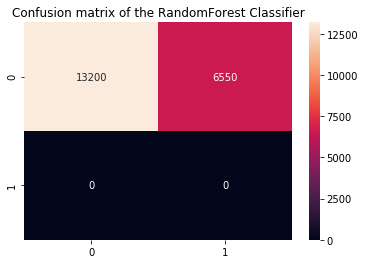

In [40]:
cm_rfc = confusion_matrix(y_validation, y_predict_r)
plt.title('Confusion matrix of the Logistic Regression')
sns.heatmap(cm_rfc, annot = True, fmt='d')
plt.show()

#Overfitting!!?

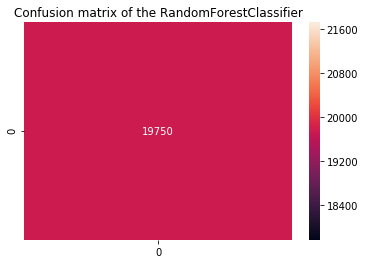

In [41]:
cm_rfc = confusion_matrix(y_validation, predictions)
plt.title('Confusion matrix of the RandomForestClassifier')
sns.heatmap(cm_rfc, annot = True, fmt='d')
plt.show()

Funny thing is going by the choosen validation data, taken from a submission file, the RandomForestClassifier is perfect, does predict all our values correctlr, however the default to an overfitting. Otherwise the Logistic Regression gives us some room for error or relevant bias and distributes closely to the train data, and the guess is the algorithm is made for such Binary Classiifcation problems like this.

In [66]:
a = pd.DataFrame(y_predict_r)
a[0].value_counts() 

#Here is the porblem our output is greatly biased

0.0    13200
1.0     6550
Name: 0, dtype: int64

In [68]:
y_validation['target'].value_counts()
# However our validation values are entirely 0's.

0    19750
Name: target, dtype: int64

### ROC Curve

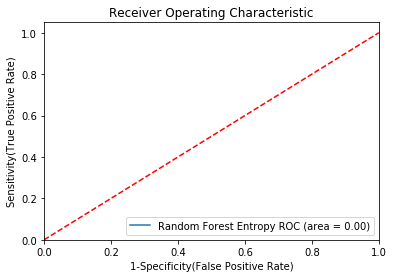

In [47]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

m = {'label': 'Random Forest Entropy',
 'model': RandomForestClassifier(bootstrap=True, class_weight=None, 
                                 criterion='entropy',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
             oob_score=False, random_state=47, verbose=0, warm_start=False)}
predictions # predict the test data
# Compute False postive rate, True positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_validation, 
                                         random_forest_e.predict_proba(X_s_validation)[:,1])
# Now, plot the computed values
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], 0.0))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('LR: Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

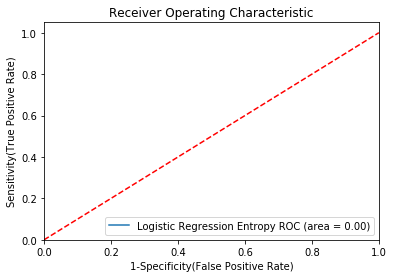

In [49]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

m = {'label': 'Logistic Regression Entropy',
 'model': LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=0,
          solver='saga', tol=0.0001, verbose=0, warm_start=False)}
y_predict_r # predict the test data
# Compute False postive rate, and True positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_validation, 
                                         logi.predict_proba(X_s_validation)[:,1])
# Now, plot the computed values
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], 0.0))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('RFC: Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Features Importance Plot

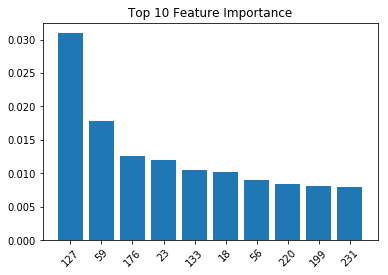

In [50]:
importances = random_forest_e.feature_importances_
indices = np.argsort(importances)[::-1][:10]

names = [X.columns[i] for i in indices]

plt.figure()

plt.title('Top 10 Feature Importance')

plt.bar(range(10), importances[indices])

plt.xticks(range(10), names, rotation=45)
plt.show()

In [51]:
highest_ten = X.corrwith(train_Df.target).abs().sort_values(ascending = False)[:10]
print(highest_ten, '\n')

127    0.337540
176    0.217100
18     0.206452
59     0.203166
135    0.179960
16     0.179796
241    0.173879
126    0.167064
69     0.164571
74     0.157756
dtype: float64 



In [55]:
pred = pd.DataFrame(y_predict_r) #Logistic Regression
pred2 = pd.DataFrame(predictions) #RFClassifier

In [73]:
pred[0].value_counts(normalize = True), pred2[0].value_counts()

(0.0    0.668354
 1.0    0.331646
 Name: 0, dtype: float64, 0.0    19750
 Name: 0, dtype: int64)

In [61]:
y_validation['target'].value_counts()

0    19750
Name: target, dtype: int64

In [71]:
y.value_counts()

0.0    183
1.0     67
Name: target, dtype: int64

In [72]:
train_Df['target'].value_counts(normalize = True)

0.0    0.732
1.0    0.268
Name: target, dtype: float64

In [74]:
submission = pd.read_csv("C:/Users/HP/Documents/ML/Py_Dataset/dont-overfit-ii/sample_submission.csv")
submission['target'] = pred
submission.to_csv('C:/Users/HP/Documents/ML/Py_Dataset/dont-overfit-ii/submission_top10.csv', index=False)

submission.head()

,id,target
0,250,1.0
1,251,0.0
2,252,0.0
3,253,1.0
4,254,1.0


In [75]:
y_validation.shape, submission.shape

((19750, 1), (19750, 2))